In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
df = pd.read_csv("processed_data.csv")
# read the input as a pandas dataframe

In [4]:
df.head()

,Unnamed: 0,action_type,combined_shot_type,loc_x,loc_y,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_name,matchup,opponent,year
0,0,Jump Shot,Jump Shot,-157,0,10,1,0,2000-01,22,15,0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,Los Angeles Lakers,LAL @ POR,POR,2000
1,1,Jump Shot,Jump Shot,-101,135,7,1,0,2000-01,45,16,1,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,Los Angeles Lakers,LAL @ POR,POR,2000
2,2,Jump Shot,Jump Shot,138,175,6,1,0,2000-01,52,22,0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,Los Angeles Lakers,LAL @ POR,POR,2000
3,3,Driving Dunk Shot,Dunk,0,0,6,2,0,2000-01,19,0,1,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,Los Angeles Lakers,LAL @ POR,POR,2000
4,4,Jump Shot,Jump Shot,-145,-11,9,3,0,2000-01,32,14,0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,Los Angeles Lakers,LAL @ POR,POR,2000


# Analysis with respect to period, time remaining and shots

In [5]:
df_sub1 = df[['period', 'minutes_remaining', 'seconds_remaining', 'shot_made_flag']]
# subset of data
df_sub1.head()

,period,minutes_remaining,seconds_remaining,shot_made_flag
0,1,10,22,0
1,1,7,45,1
2,1,6,52,0
3,2,6,19,1
4,3,9,32,0


In [6]:
df_sub1['sec_remain'] = df_sub1['minutes_remaining']*60 + df['seconds_remaining']
# total time remaining in seconds

C:\Users\anirudhkm\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [7]:
df_sub1['sec_elapsed_period_start'] = 60*(11 - df['minutes_remaining']) + (60 - df['seconds_remaining'])
# time elapsed from game start

C:\Users\anirudhkm\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [8]:
df_sub1.head()

,period,minutes_remaining,seconds_remaining,shot_made_flag,sec_remain,sec_elapsed_period_start
0,1,10,22,0,622,98
1,1,7,45,1,465,255
2,1,6,52,0,412,308
3,2,6,19,1,379,341
4,3,9,32,0,572,148


In [9]:
period_values = df_sub1['period'].unique()
# get period unique values
df_sub1['sec_elapsed_game_start'] = 0
for each in period_values:
    # iterate over each period values
    df_sub1['sec_elapsed_game_start'][df_sub1['period'] == each] = (each - 1)*720 + df_sub1['sec_elapsed_period_start'][df_sub1['period'] == each] 
    
df_sub1.head(10)

C:\Users\anirudhkm\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\anirudhkm\Anaconda3\lib\site-packages\pandas\core\generic.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\anirudhkm\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec

,period,minutes_remaining,seconds_remaining,shot_made_flag,sec_remain,sec_elapsed_period_start,sec_elapsed_game_start
0,1,10,22,0,622,98,98
1,1,7,45,1,465,255,255
2,1,6,52,0,412,308,308
3,2,6,19,1,379,341,1061
4,3,9,32,0,572,148,1588
5,3,8,52,1,532,188,1628
6,3,6,12,1,372,348,1788
7,3,3,36,0,216,504,1944
8,3,1,56,0,116,604,2044
9,1,11,0,1,660,60,60


## Histogram of second remaining data

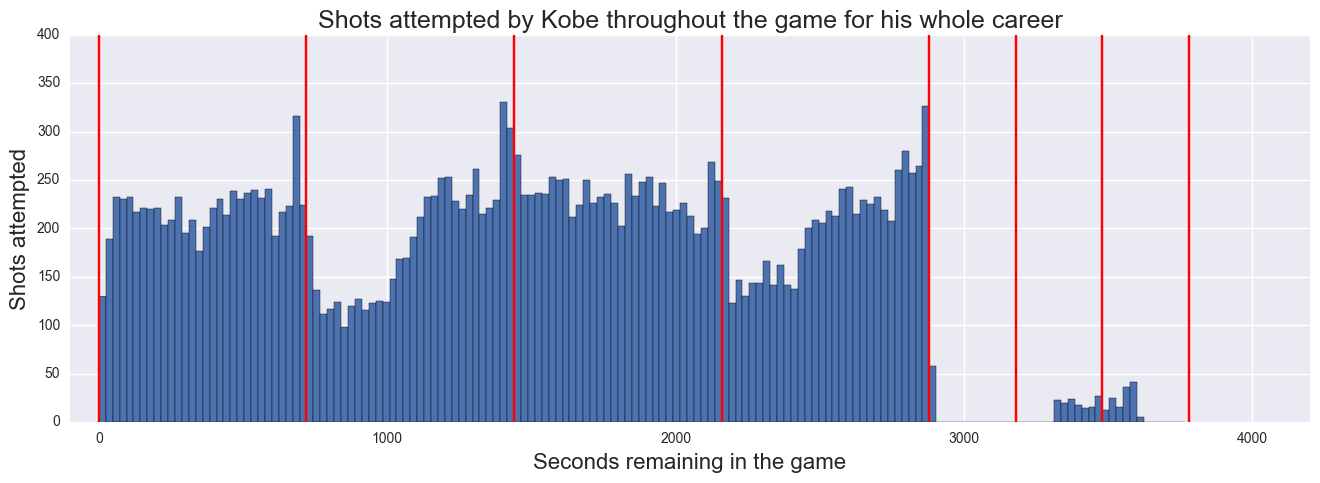

In [23]:
bins = np.arange(0, 60*(4*12+3*5), 24)
# define the bins
plt.figure(figsize=(16, 5))
plt.hist(df_sub1['sec_elapsed_game_start'], bins = bins)
# plot the histogram of the data
plt.vlines(x=[0, 12*60, 2*12*60, 3*12*60, 4*12*60, 4*12*60+5*60, 4*12*60+2*5*60, 4*12*60+3*5*60], ymin=0,ymax=400, colors='r')
# lines to show the end od a quarter
plt.xlim((-100, 4200))
plt.xlabel("Seconds remaining in the game", fontsize = 16)
plt.ylabel("Shots attempted", fontsize = 16)
plt.title("Shots attempted by Kobe throughout the game for his whole career", fontsize = 18)

## Finding accuracy for every 24 seconds

In [15]:
df_sub1['sec_bin'] = df_sub1['sec_elapsed_game_start']//24

C:\Users\anirudhkm\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [16]:
hit_accuracy_24sec = df_sub1[['sec_bin', 'shot_made_flag']].groupby('sec_bin').sum()/df_sub1[['sec_bin', 'shot_made_flag']].groupby('sec_bin').count()
hit_accuracy_24sec.head()

,shot_made_flag
sec_bin,
0,0.469231
1,0.428571
2,0.422414
3,0.486957
4,0.489270


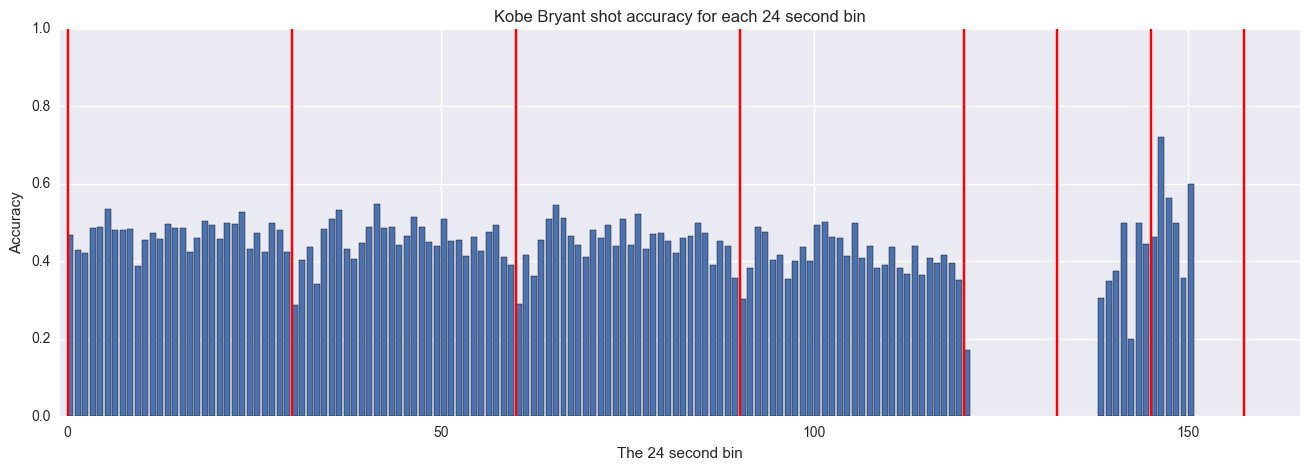

In [17]:
plt.figure(figsize=(16,5))
plt.bar(hit_accuracy_24sec.index[:-1], hit_accuracy_24sec['shot_made_flag'][:-1])
plt.vlines(x=[0, 1*30, 2*30, 3*30, 4*30, 4*30+1*12.5, 4*30+2*12.5, 4*30+3*12.5], ymin=0,ymax=1, colors='r')
plt.xlim(-1, 165)
plt.title("Kobe Bryant shot accuracy for each 24 second bin")
plt.xlabel("The 24 second bin")
plt.ylabel("Accuracy")

# Analysis of Kobe's shots from distance

In [18]:
df['distance'] = np.sqrt(df['loc_x']**2  + df['loc_y']**2)
# calculate dist from basket hoop
seasons = df['year'].unique()
# get unique seasons
opponents = df['opponent'].unique()
# get unique opponents
dist_season, dist_oppo = [], []
# empty lists
for season in seasons:
    # iterate over each season
    sub = df[df['year'] == season]
    dist_season.append(np.mean(sub['distance']))
    # get avg distance for each year
    
for oppo in opponents:
    # iterate over each season
    sub = df[df['opponent'] == oppo]
    dist_oppo.append(np.mean(sub['distance']))
    # get avg distance for each year


In [26]:
coff = np.polyfit(seasons, [i/10 for i in dist_season], 3)
x = np.linspace(1996, 2015, 500)
y = np.multiply(coff[0],x**3) + np.multiply(coff[1],x**2) + np.multiply(coff[2],x) + coff[3]

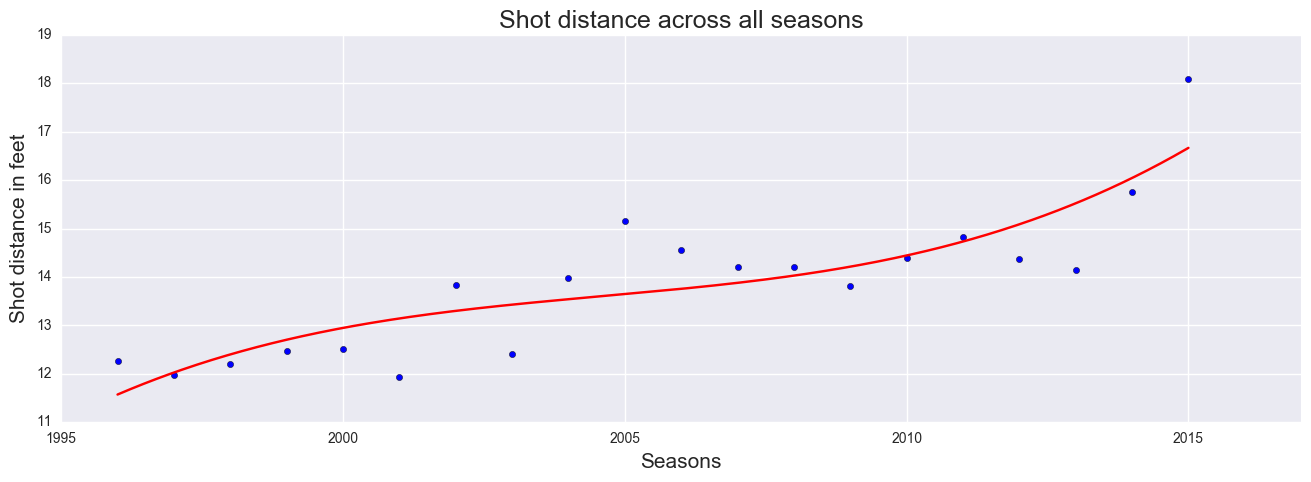

In [27]:
plt.figure(figsize=(16,5))
plt.plot(x, y, color = 'r')
plt.scatter(seasons, [i/10 for i in dist_season])
plt.xlim((1995, 2017))
plt.title("Shot distance across all seasons", fontsize = 18)
plt.xlabel("Seasons", fontsize = 15)
plt.ylabel("Shot distance in feet", fontsize = 15)

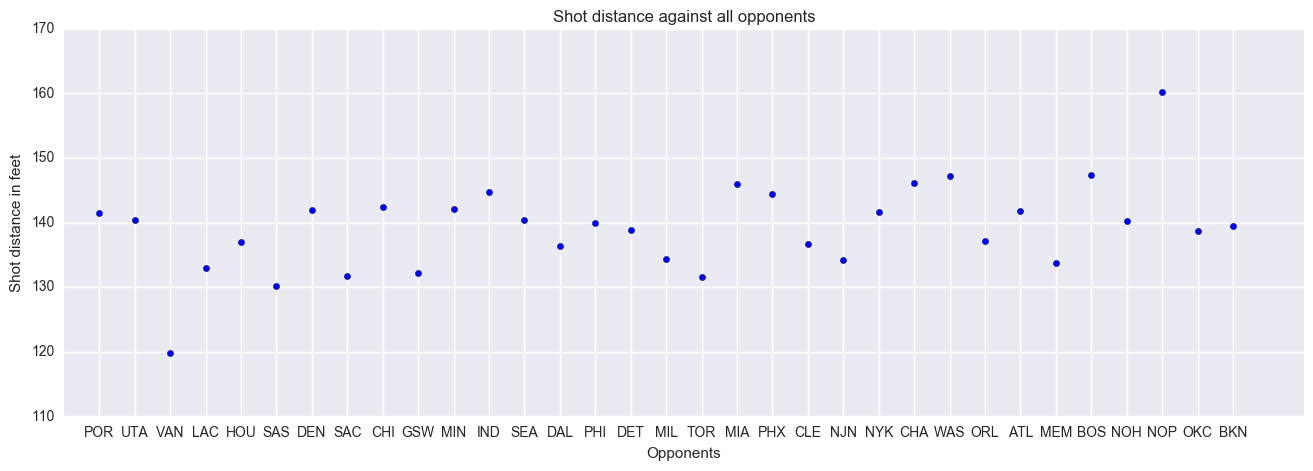

In [28]:
plt.figure(figsize=(16,5))
plt.plot(x, y, color = 'r')
oppo_map = list(range(1, len(opponents) + 1))
plt.scatter(oppo_map, dist_oppo)
plt.xlim((0, 35))
plt.xticks(oppo_map, opponents)
plt.title("Shot distance against all opponents")
plt.xlabel("Opponents")
plt.ylabel("Shot distance in feet")

# Based on his action type

In [29]:
df_sub2 = df[['combined_shot_type', 'opponent', 'year']]
# get the subset of the data
df_sub2.head()

,combined_shot_type,opponent,year
0,Jump Shot,POR,2000
1,Jump Shot,POR,2000
2,Jump Shot,POR,2000
3,Dunk,POR,2000
4,Jump Shot,POR,2000


In [30]:
d = pd.get_dummies(df_sub2, columns = ['combined_shot_type'])
# shot made flag
d.head()

,opponent,year,combined_shot_type_Bank Shot,combined_shot_type_Dunk,combined_shot_type_Hook Shot,combined_shot_type_Jump Shot,combined_shot_type_Layup,combined_shot_type_Tip Shot
0,POR,2000,0.0,0.0,0.0,1.0,0.0,0.0
1,POR,2000,0.0,0.0,0.0,1.0,0.0,0.0
2,POR,2000,0.0,0.0,0.0,1.0,0.0,0.0
3,POR,2000,0.0,1.0,0.0,0.0,0.0,0.0
4,POR,2000,0.0,0.0,0.0,1.0,0.0,0.0


In [31]:
d = d.groupby(by = ['year', 'opponent']).sum()
# group the data
d.head()

combined_shot_type_Bank Shot  combined_shot_type_Dunk  \
year opponent                                                          
1996 ATL                                0.0                      0.0   
     BOS                                0.0                      0.0   
     CHA                                0.0                      1.0   
     CHI                                0.0                      0.0   
     CLE                                0.0                      0.0   

               combined_shot_type_Hook Shot  combined_shot_type_Jump Shot  \
year opponent                                                               
1996 ATL                                0.0                           1.0   
     BOS                                0.0                           3.0   
     CHA                                0.0                           9.0   
     CHI                                0.0                           6.0   
     CLE                                0.0                           6.0   

               combined_shot_type_Layup  combined_shot_type_Tip Shot  
year opponent                                                         
1996 ATL                            3.0                          0.0  
     BOS                            2.0                          0.0  
     CHA                            3.0                          1.0  
     CHI                            2.0                          1.0  
     CLE                            0.0                          0.0

In [32]:
years = df_sub2['year'].unique()
teams = df_sub2['opponent'].unique()
print(len(d))
for y in years:
    for team in teams:
        try:
            d.loc[(y, team)]
        except KeyError:
            d.loc[(y, team), 'combined_shot_type_Bank Shot'] = 0
            d.loc[(y, team), 'combined_shot_type_Dunk'] = 0
            d.loc[(y, team), 'combined_shot_type_Hook Shot'] = 0
            d.loc[(y, team), 'combined_shot_type_Jump Shot'] = 0
            d.loc[(y, team), 'combined_shot_type_Layup'] = 0
            d.loc[(y, team), 'combined_shot_type_Tip Shot'] = 0        

529


In [33]:
d.head()

combined_shot_type_Bank Shot  combined_shot_type_Dunk  \
year opponent                                                          
1996 ATL                                0.0                      0.0   
     BOS                                0.0                      0.0   
     CHA                                0.0                      1.0   
     CHI                                0.0                      0.0   
     CLE                                0.0                      0.0   

               combined_shot_type_Hook Shot  combined_shot_type_Jump Shot  \
year opponent                                                               
1996 ATL                                0.0                           1.0   
     BOS                                0.0                           3.0   
     CHA                                0.0                           9.0   
     CHI                                0.0                           6.0   
     CLE                                0.0                           6.0   

               combined_shot_type_Layup  combined_shot_type_Tip Shot  
year opponent                                                         
1996 ATL                            3.0                          0.0  
     BOS                            2.0                          0.0  
     CHA                            3.0                          1.0  
     CHI                            2.0                          1.0  
     CLE                            0.0                          0.0

In [ ]:
d['total'] = d.sum(axis = 1)
d.head()

In [35]:
for col in d.columns:
    # iterate over each column
    d[col] = d[col]/d['total']
    
d.drop('total', axis = 1, inplace = True)

In [ ]:
d.fillna(0, inplace = True)
d.to_csv("action_type.csv")
# write to file

# Success of Kobe with respect to 2 point and 3 point shots

In [37]:
df_sub3 = df[['shot_type', 'opponent', 'year', 'shot_made_flag']]
# get the subset of the data
df_sub3.head()

,shot_type,opponent,year,shot_made_flag
0,2PT Field Goal,POR,2000,0
1,2PT Field Goal,POR,2000,1
2,2PT Field Goal,POR,2000,0
3,2PT Field Goal,POR,2000,1
4,2PT Field Goal,POR,2000,0


In [38]:
hit_point = df_sub3[df_sub3['shot_made_flag'] == 1]
miss_point = df_sub3[df_sub3['shot_made_flag'] == 0]
# get hit and miss points

In [40]:
d_hit = pd.get_dummies(hit_point.drop('shot_made_flag', axis = 1), columns = ['shot_type'])
# shot made flag

,opponent,year,shot_type_2PT Field Goal,shot_type_3PT Field Goal
1,POR,2000,1.0,0.0
3,POR,2000,1.0,0.0
5,POR,2000,1.0,0.0
6,POR,2000,1.0,0.0
9,UTA,2000,1.0,0.0


In [41]:
d_hit = d_hit.groupby(['year', 'opponent']).sum()
d_hit.head()

shot_type_2PT Field Goal  shot_type_3PT Field Goal
year opponent                                                    
1996 BOS                            1.0                       0.0
     CHA                            5.0                       1.0
     CHI                            2.0                       2.0
     CLE                            1.0                       1.0
     DAL                            7.0                       1.0

In [45]:
years = df_sub3['year'].unique()
teams = df_sub3['opponent'].unique()
for y in years:
    for team in teams:
        try:
            d_hit.loc[(y, team)]
        except KeyError:
            d_hit.loc[(y, team), 'shot_type_3PT Field Goal'] = 0
            d_hit.loc[(y, team), 'shot_type_2PT Field Goal'] = 0 
d_hit.head()

shot_type_2PT Field Goal  shot_type_3PT Field Goal
year opponent                                                    
1996 BOS                            1.0                       0.0
     CHA                            5.0                       1.0
     CHI                            2.0                       2.0
     CLE                            1.0                       1.0
     DAL                            7.0                       1.0

In [46]:
d_miss = pd.get_dummies(miss_point.drop('shot_made_flag', axis = 1), columns = ['shot_type'])
# shot made flag
d_miss = d_miss.groupby(['year', 'opponent']).sum()
years = df_sub3['year'].unique()
teams = df_sub3['opponent'].unique()
for y in years:
    for team in teams:
        try:
            d_miss.loc[(y, team)]
        except KeyError:
            d_miss.loc[(y, team), 'shot_type_3PT Field Goal'] = 0
            d_miss.loc[(y, team), 'shot_type_2PT Field Goal'] = 0 
d_miss.head()

shot_type_2PT Field Goal  shot_type_3PT Field Goal
year opponent                                                    
1996 ATL                            4.0                       0.0
     BOS                            2.0                       2.0
     CHA                            6.0                       2.0
     CHI                            3.0                       2.0
     CLE                            2.0                       2.0

0.0

In [52]:
point_type = pd.DataFrame()
# empty dataframe
d_hit['shot_type_2PT Field Goal']  = d_hit['shot_type_2PT Field Goal'] / ( d_hit['shot_type_2PT Field Goal'] +  d_miss['shot_type_2PT Field Goal'])
d_hit['shot_type_3PT Field Goal']  = d_hit['shot_type_3PT Field Goal'] / ( d_hit['shot_type_3PT Field Goal'] +  d_miss['shot_type_3PT Field Goal'])

d_hit.fillna(0, inplace=True)
d_hit.head()

shot_type_2PT Field Goal  shot_type_3PT Field Goal
year opponent                                                    
1996 BOS                       0.333333                  0.000000
     CHA                       0.454545                  0.333333
     CHI                       0.400000                  0.500000
     CLE                       0.333333                  0.333333
     DAL                       0.411765                  0.142857

In [53]:
d_hit.to_csv("point_type_accuracy.csv")

In [27]:
#%% define draw functions (stealing shamelessly the draw_court() function from MichaelKrueger's excelent script)
import matplotlib as mpl
def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

def Draw2DGaussians(gaussianMixtureModel, ellipseColors, ellipseTextMessages):
    
    fig, h = plt.subplots();
    for i, (mean, covarianceMatrix) in enumerate(zip(gaussianMixtureModel.means_, gaussianMixtureModel._get_covars())):
        # get the eigen vectors and eigen values of the covariance matrix
        v, w = np.linalg.eigh(covarianceMatrix)
        v = 2.5*np.sqrt(v) # go to units of standard deviation instead of variance
        
        # calculate the ellipse angle and two axis length and draw it
        u = w[0] / np.linalg.norm(w[0])    
        angle = np.arctan(u[1] / u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        currEllipse = mpl.patches.Ellipse(mean, v[0], v[1], 180 + angle, color=ellipseColors[i])
        currEllipse.set_alpha(0.5)
        h.add_artist(currEllipse)
        h.text(mean[0]+7, mean[1]-1, ellipseTextMessages[i], fontsize=12)

In [28]:
from matplotlib.patches import Circle, Rectangle, Arc
from sklearn import mixture
import warnings
warnings.filterwarnings('ignore')
#%% cluster the shot attempts of kobe using GMM on their location

numGaussians = 13
gaussianMixtureModel = mixture.GMM(n_components=numGaussians, covariance_type='full', 
                                   params='wmc', init_params='wmc',
                                   random_state=1, n_init=3,  verbose=0)
gaussianMixtureModel.fit(df.ix[:,['loc_x','loc_y']])

df['shotLocationCluster'] = gaussianMixtureModel.predict(df.ix[:,['loc_x','loc_y']])

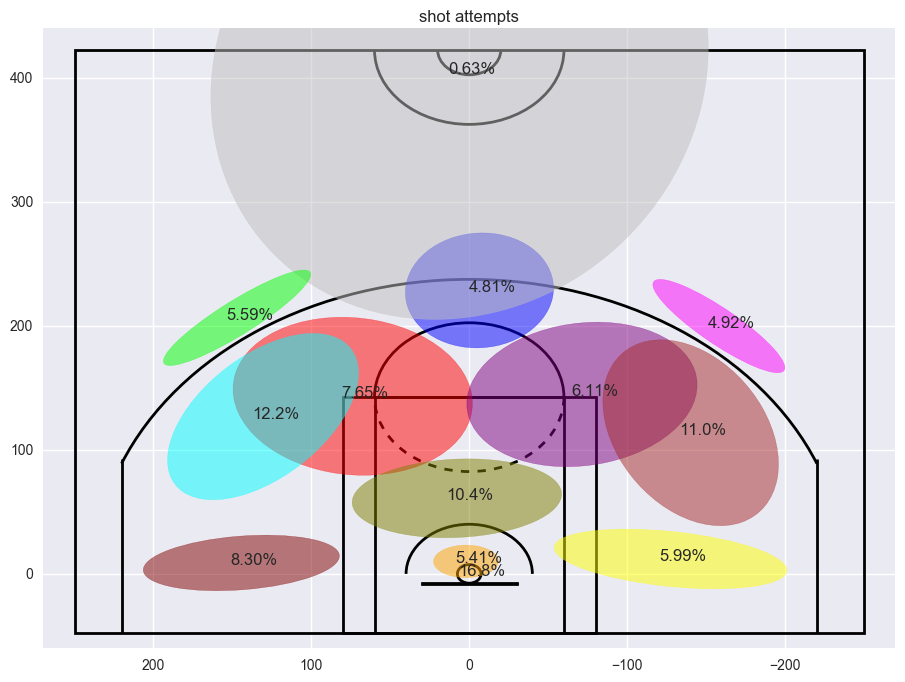

In [29]:
#%% show gaussian mixture elipses of shot attempts
plt.rcParams['figure.figsize'] = (11, 8)

ellipseTextMessages = [str(100*gaussianMixtureModel.weights_[x])[:4]+'%' for x in range(numGaussians)]
ellipseColors = ['red','green','purple','cyan','magenta','yellow','blue','orange','silver','maroon','lime','olive','brown','darkblue']
Draw2DGaussians(gaussianMixtureModel, ellipseColors, ellipseTextMessages)
draw_court(outer_lines=True); plt.ylim(-60,440); plt.xlim(270,-270); plt.title('shot attempts')

Now let's plot the accuracy of each cluster to get a feel what are easy and what are difficult shots

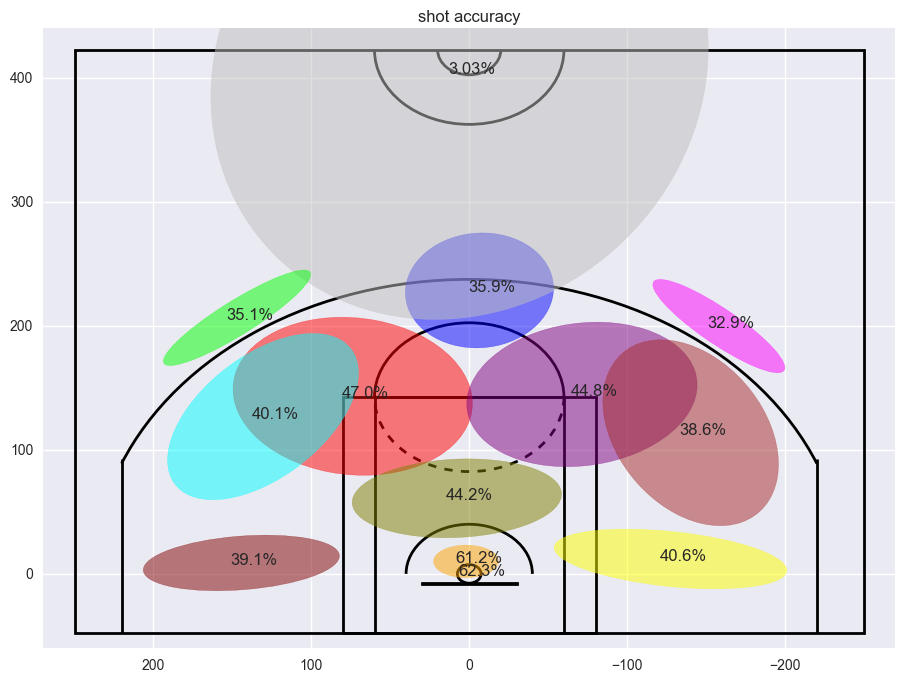

In [33]:
#%% for each cluster, calculate it's individual accuracy and plot it

plt.rcParams['figure.figsize'] = (11, 8)

variableCategories = df['shotLocationCluster'].value_counts().index.tolist()

clusterAccuracy = {}
for category in variableCategories:
    shotsAttempted = np.array(df['shotLocationCluster'] == category).sum()
    shotsMade = np.array(df.ix[df['shotLocationCluster'] == category,'shot_made_flag'] == 1).sum()
    clusterAccuracy[category] = float(shotsMade)/shotsAttempted

ellipseTextMessages = [str(100*clusterAccuracy[x])[:4]+'%' for x in range(numGaussians)]
Draw2DGaussians(gaussianMixtureModel, ellipseColors, ellipseTextMessages)
draw_court(outer_lines=True); plt.ylim(-60,440); plt.xlim(270,-270); plt.title('shot accuracy')


We can clearly see the dependence between distance and accuracy
Another interesting fact is that Kobe not only makes more attempts from the right side (from his point of view), but also he's better at making those attempts